<a href="https://colab.research.google.com/github/AymanAl-Rashidi/yolo_project/blob/main/yolo_projectipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip dataset_V2.zip -d Dataset_V2 # فك الضغط عن الداتا

Archive:  dataset_V2.zip
   creating: Dataset_V2/dataset_V2/
  inflating: Dataset_V2/__MACOSX/._dataset_V2  
  inflating: Dataset_V2/dataset_V2/README.roboflow.txt  
  inflating: Dataset_V2/__MACOSX/dataset_V2/._README.roboflow.txt  
   creating: Dataset_V2/dataset_V2/valid/
  inflating: Dataset_V2/__MACOSX/dataset_V2/._valid  
  inflating: Dataset_V2/dataset_V2/README.dataset.txt  
  inflating: Dataset_V2/__MACOSX/dataset_V2/._README.dataset.txt  
  inflating: Dataset_V2/dataset_V2/.DS_Store  
  inflating: Dataset_V2/__MACOSX/dataset_V2/._.DS_Store  
  inflating: Dataset_V2/dataset_V2/data.yaml  
  inflating: Dataset_V2/__MACOSX/dataset_V2/._data.yaml  
   creating: Dataset_V2/dataset_V2/train/
  inflating: Dataset_V2/__MACOSX/dataset_V2/._train  
  inflating: Dataset_V2/dataset_V2/valid/.DS_Store  
  inflating: Dataset_V2/__MACOSX/dataset_V2/valid/._.DS_Store  
   creating: Dataset_V2/dataset_V2/valid/images/
  inflating: Dataset_V2/__MACOSX/dataset_V2/valid/._images  
   creating: D

In [ ]:
# نشوف إيش داخل المجلد الفرعي
!ls Dataset_V2/dataset_V2

print("\n----- data.yaml -----\n")
!cat Dataset_V2/dataset_V2/data.yaml


data.yaml  README.dataset.txt  README.roboflow.txt  train  valid

----- data.yaml -----

train: ../train/images
val: ../valid/images

nc: 5
names: ['Blood', 'Handgun', 'llegal_Substances', 'Rifle', 'Knife']

roboflow:
  workspace: round2-ps3mh
  project: orion_val_imgs
  version: 7
  license: CC BY 4.0
  url: https://universe.roboflow.com/round2-ps3mh/orion_val_imgs/dataset/7

In [ ]:
!pip install ultralytics
from ultralytics import YOLO




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.4 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model = YOLO("yolov8n.pt")   # أصغر مودل للتجارب السريعة


In [ ]:
results = model.train(
    data="Dataset_V2/dataset_V2/data.yaml",
    epochs=1,          # فقط واحد علشان نختصر الوقت
    imgsz=640,
    batch=8,
    name="quick_train"
)


Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Dataset_V2/dataset_V2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=quick_train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True,

For now try the best mode For this Project



image 1/1 /content/gub test.png: 640x512 1 Handgun, 47.7ms
Speed: 1.7ms preprocess, 47.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


(np.float64(-0.5), np.float64(294.5), np.float64(378.5), np.float64(-0.5))

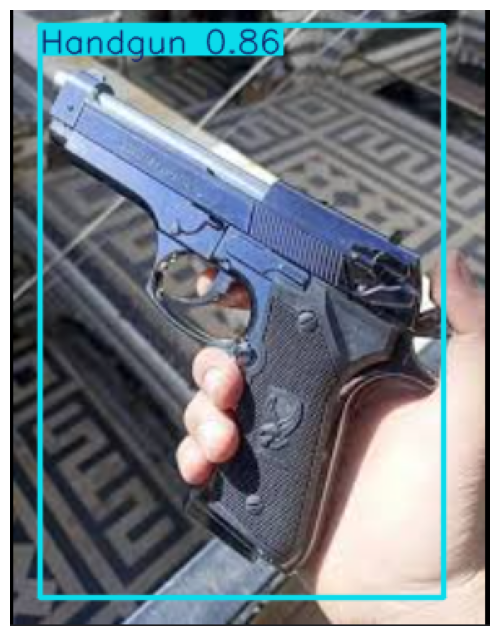

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

model = YOLO("best.pt")
results = model.predict("gub test.png", save=False)

img = results[0].plot()
img = img[:, :, ::-1]

plt.figure(figsize=(8,8))
plt.imshow(img)
plt.axis("off")



image 1/1 /content/realblod.png: 320x640 1 Blood, 37.8ms
Speed: 2.1ms preprocess, 37.8ms inference, 1.4ms postprocess per image at shape (1, 3, 320, 640)


(np.float64(-0.5), np.float64(707.5), np.float64(353.5), np.float64(-0.5))

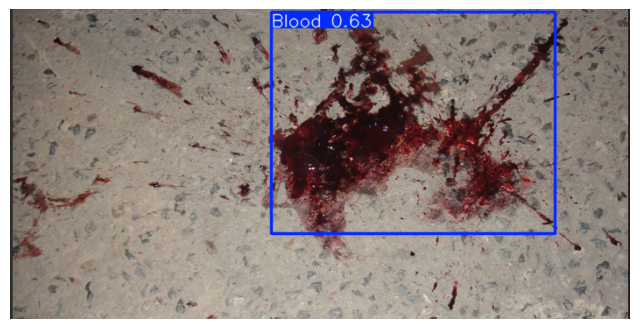

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

model = YOLO("best.pt")
results = model.predict("realblod.png", save=False)

img = results[0].plot()
img = img[:, :, ::-1]

plt.figure(figsize=(8,8))
plt.imshow(img)
plt.axis("off")



image 1/1 /content/knife.png: 640x640 1 Knife, 62.6ms
Speed: 2.5ms preprocess, 62.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


(np.float64(-0.5), np.float64(554.5), np.float64(560.5), np.float64(-0.5))

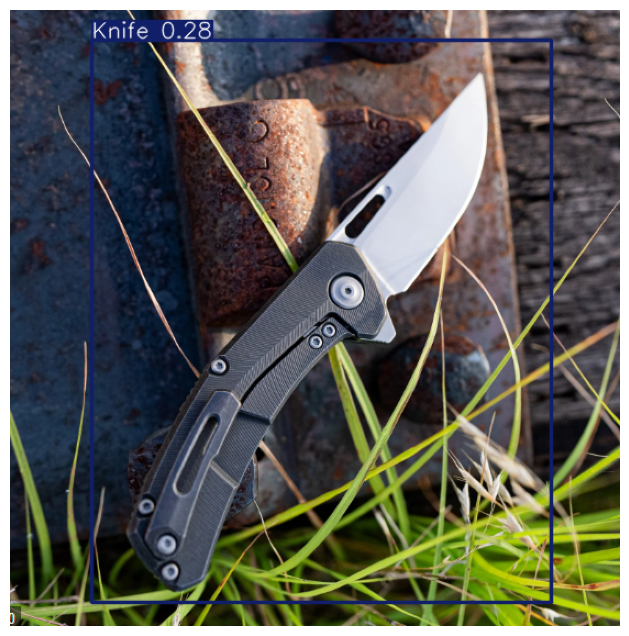

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

model = YOLO("best.pt")
results = model.predict("knife.png", save=False)

img = results[0].plot()
img = img[:, :, ::-1]

plt.figure(figsize=(8,8))
plt.imshow(img)
plt.axis("off")


In [ ]:
!gdown 1iqVWjKo9MUc5R6eutrZXSccOUCC9IAav

Downloading...
From (original): https://drive.google.com/uc?id=1iqVWjKo9MUc5R6eutrZXSccOUCC9IAav
From (redirected): https://drive.google.com/uc?id=1iqVWjKo9MUc5R6eutrZXSccOUCC9IAav&confirm=t&uuid=4d0da5fb-10b2-4fad-bfab-d332f3adc499
To: /content/BASR_Model.pt
100% 40.5M/40.5M [00:00<00:00, 54.4MB/s]



image 1/1 /content/person.webp: 480x640 1 Person, 99.0ms
Speed: 10.7ms preprocess, 99.0ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


(np.float64(-0.5), np.float64(389.5), np.float64(279.5), np.float64(-0.5))

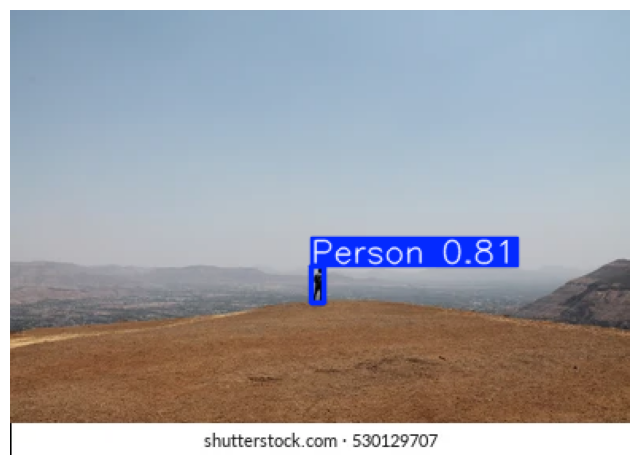

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

model = YOLO("BASR_Model.pt")
results = model.predict("person.webp", save=False)

img = results[0].plot()
img = img[:, :, ::-1]

plt.figure(figsize=(8,8))
plt.imshow(img)
plt.axis("off")